### Objective
#### Train a SVM regressor model on a syntheticly made dataset

In [ ]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Regression


In [ ]:
np.random.seed(42)
m = 50 #number of instances
X = 2 * np.random.rand(m, 1) # generating synthetic X
y = (4 + 3 * X + np.random.randn(m, 1)).ravel() # generating synthetic y = 3X + 4 + e

In [ ]:
#Question - How do I confirm is this problem is Classificaiton or Regression?
y

array([ 6.98570729,  9.87565412,  8.27631537,  7.29084721,  3.45758985,
        4.21612291,  3.8878629 , 10.2541791 ,  7.95030836,  6.48539531,
        4.44759094,  9.43437683,  8.31773384,  5.88571095,  6.12194933,
        6.03170718,  4.98623593,  6.83932621,  6.92293354,  6.72291997,
        7.19194313,  4.65130419,  4.64653292,  5.00196444,  7.54894573,
       10.0672958 ,  5.12603257,  8.08893953,  7.91612344,  3.63358272,
        8.00666472,  6.56118131,  4.35448352, 11.25795688,  7.17404709,
        9.67228659,  5.91472968,  4.28702533,  8.19715894,  4.65334605,
        4.51255752,  7.32817403,  5.68422517,  8.93765219,  4.74418629,
        7.47337666,  6.78566857,  7.44915924,  6.75050147,  5.62239417])

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [ ]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

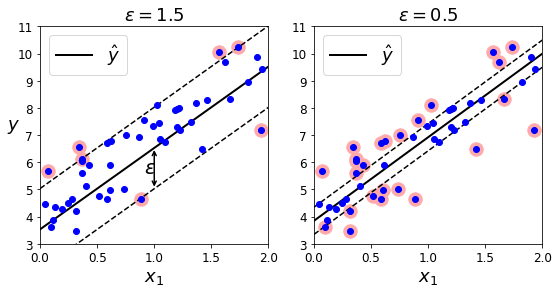

In [ ]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

# Lets try Kernels in SVR

In [ ]:
import numpy as np
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel() #manually adding X^2
X

array([[-0.25091976],
       [ 0.90142861],
       [ 0.46398788],
       [ 0.19731697],
       [-0.68796272],
       [-0.68801096],
       [-0.88383278],
       [ 0.73235229],
       [ 0.20223002],
       [ 0.41614516],
       [-0.95883101],
       [ 0.9398197 ],
       [ 0.66488528],
       [-0.57532178],
       [-0.63635007],
       [-0.63319098],
       [-0.39151551],
       [ 0.04951286],
       [-0.13610996],
       [-0.41754172],
       [ 0.22370579],
       [-0.72101228],
       [-0.4157107 ],
       [-0.26727631],
       [-0.08786003],
       [ 0.57035192],
       [-0.60065244],
       [ 0.02846888],
       [ 0.18482914],
       [-0.90709917],
       [ 0.2150897 ],
       [-0.65895175],
       [-0.86989681],
       [ 0.89777107],
       [ 0.93126407],
       [ 0.6167947 ],
       [-0.39077246],
       [-0.80465577],
       [ 0.36846605],
       [-0.11969501],
       [-0.75592353],
       [-0.00964618],
       [-0.93122296],
       [ 0.8186408 ],
       [-0.48244004],
       [ 0

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=6, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=6, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

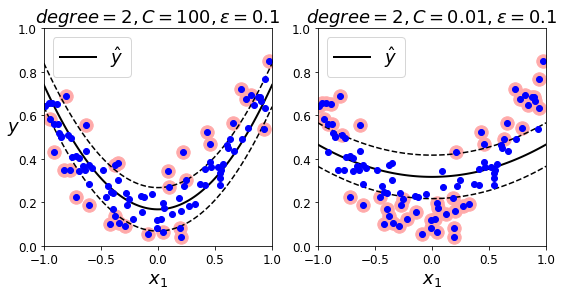

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()